# Decision Tree

## Importing Liberaries

##### Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively. It provides various data structures and operations for manipulating numerical data and time series. 

###### The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction


In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
#Load Data
data = pd.read_csv("Data_Scientist_Salary.csv")

In [10]:
#The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.
data.describe(include='all')

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
count,742.000000,742,742,742,742.000000,742,742,742,742,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742,742,742
unique,NaN,264,416,463,NaN,343,200,198,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,3
top,NaN,Data Scientist,$86K-$143K (Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,NaN,MassMutual\n3.6,"New York, NY","New York, NY",1001 - 5000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data scientist,na,na
freq,NaN,131,6,4,NaN,14,55,52,150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,519,383
mean,469.129380,NaN,NaN,NaN,3.618868,NaN,NaN,NaN,NaN,1837.154987,...,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868,NaN,NaN,NaN
std,279.793117,NaN,NaN,NaN,0.801210,NaN,NaN,NaN,NaN,497.183763,...,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,221.500000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1939.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,472.500000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,1988.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,707.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [11]:
#Head shows first 5 Rows
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [12]:
#Head shows first 10 rows
data.head(10)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,...,0,0,0,1,0,1,0,data scientist,na,na
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,...,0,0,0,0,0,0,0,data scientist,na,na
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 - 500,2005,...,1,0,0,0,0,0,0,data scientist,na,M
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+,2014,...,0,0,0,0,0,0,0,other scientist,na,P
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,...,0,0,0,0,0,0,0,data scientist,na,na


In [13]:
#tail shows last 5 rows
data.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,...,0,0,0,0,0,0,0,other scientist,na,M


In [14]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. Note: The correlation of a variable with itself is 1.
data.corr()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
index,1.000000,-0.140705,-0.081748,0.054596,0.051151,-0.046113,-0.027764,-0.035750,0.007947,-0.108912,...,-0.110127,-0.013630,-0.122056,-0.093148,0.003940,-0.039566,-0.014000,-0.005656,-0.015961,0.001105
Rating,-0.140705,1.000000,0.332927,-0.019531,-0.468234,-0.009638,0.027332,0.012475,0.023162,0.144665,...,0.076893,0.058564,0.110033,0.069042,0.145098,0.001717,0.039784,0.048338,0.035587,-0.019351
Founded,-0.081748,0.332927,1.000000,0.049313,-0.312761,-0.033732,0.007169,-0.009609,0.139165,0.103183,...,0.005844,0.019728,0.022332,0.040374,0.025715,0.060605,0.055393,0.038379,0.058025,0.044355
Hourly,0.054596,-0.019531,0.049313,1.000000,0.124748,-0.197587,-0.269446,-0.243771,0.007847,-0.193487,...,-0.036872,-0.043062,-0.051221,-0.059934,-0.081895,-0.053132,-0.052237,-0.021369,-0.041884,-0.025354
Employer provided,0.051151,-0.468234,-0.312761,0.124748,1.000000,0.189375,0.029831,0.096133,-0.110649,-0.107924,...,-0.030882,-0.036067,-0.042900,-0.050198,-0.068592,-0.008810,-0.043751,-0.017898,-0.035080,-0.021235
Lower Salary,-0.046113,-0.009638,-0.033732,-0.197587,0.189375,1.000000,0.939995,0.978679,0.003010,0.326078,...,0.099196,0.049714,0.178374,0.147471,0.093147,-0.049153,-0.026770,0.074627,0.057677,-0.118053
Upper Salary,-0.027764,0.027332,0.007169,-0.269446,0.029831,0.939995,1.000000,0.990032,0.034607,0.300576,...,0.124101,0.040261,0.173760,0.164820,0.119785,-0.090469,-0.055548,0.091450,0.078266,-0.123877
Avg Salary(K),-0.035750,0.012475,-0.009609,-0.243771,0.096133,0.978679,0.990032,1.000000,0.022076,0.315552,...,0.115658,0.044759,0.178237,0.160098,0.110562,-0.074753,-0.044491,0.085859,0.070925,-0.123306
Age,0.007947,0.023162,0.139165,0.007847,-0.110649,0.003010,0.034607,0.022076,1.000000,-0.098626,...,-0.065947,-0.039562,-0.081608,-0.055830,-0.053311,-0.055828,0.020544,-0.058273,0.044605,-0.058240
Python,-0.108912,0.144665,0.103183,-0.193487,-0.107924,0.326078,0.300576,0.315552,-0.098626,1.000000,...,0.190566,0.113676,0.254331,0.209430,0.235114,0.154118,0.167770,0.063615,0.080035,-0.027705


In [15]:
# columns gives column names of features
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [16]:
# shape gives number of rows and columns in a tuble
data.shape

(742, 42)

In [17]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [18]:
#The dtypes property is used to find the dtypes in the DataFrame. This returns a Series with the data type of each column.
data.dtypes

index                   int64
Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop    

<AxesSubplot:>

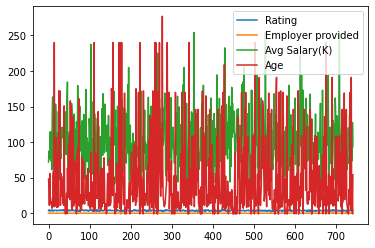

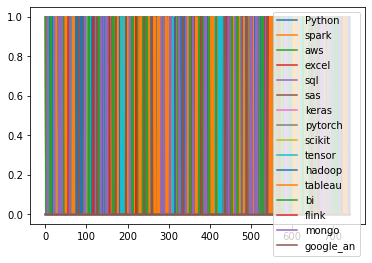

In [19]:
# Plotting all data 
data1 = data.loc[:,["Job Title","Salary Estimate","Rating","Company Name","Location","Headquarters",
"Revenue","Competitors","Employer provided","Avg Salary(K)","Job Location","Age"]]

data2 = data.loc[:,["Python","spark","aws","excel","sql","sas","keras","pytorch","scikit","tensor","hadoop",
"tableau","bi","flink","mongo","google_an","job_title_sim","seniority_by_title", "Degree"]]

data1.plot()
data2.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

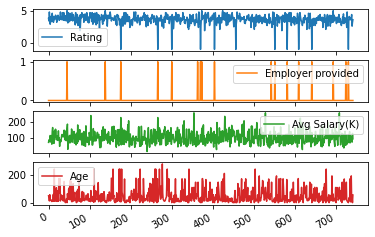

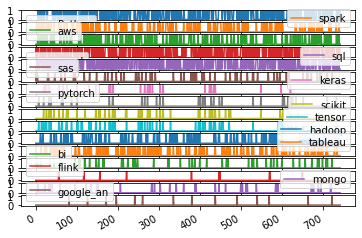

In [20]:
data1.plot(subplots = True)
data2.plot(subplots = True)

<AxesSubplot:xlabel='Job Title', ylabel='Age'>

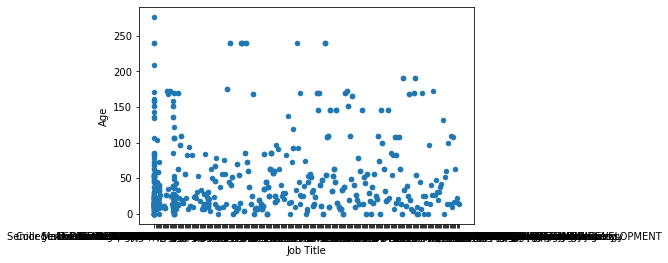

In [23]:
data1.plot(kind="scatter",x="Job Title",y="Age")

In [24]:
# pandas, a missing value is denoted by NaN
data.isnull()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:ylabel='Frequency'>

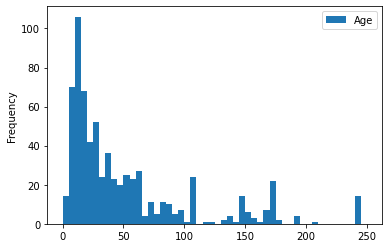

In [26]:
# hist plot : A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.
data1.plot(kind = "hist",y = "Age",bins = 50,range= (0,250))

In [27]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

In [28]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

index              0
Job Title          0
Salary Estimate    0
Job Description    0
Rating             0
Company Name       0
Location           0
Headquarters       0
Size               0
Founded            0
dtype: int64

In [29]:
# Features Selection
# iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [31]:
# remove all the rows that contain a missing value
data.dropna()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [36]:
# remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [37]:
#split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

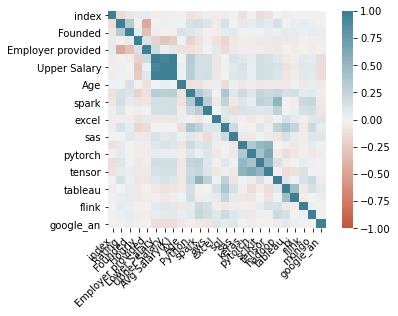

In [40]:
#correlation map
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [41]:
data.columns[:-1]

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title'],
      dtype='object')

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

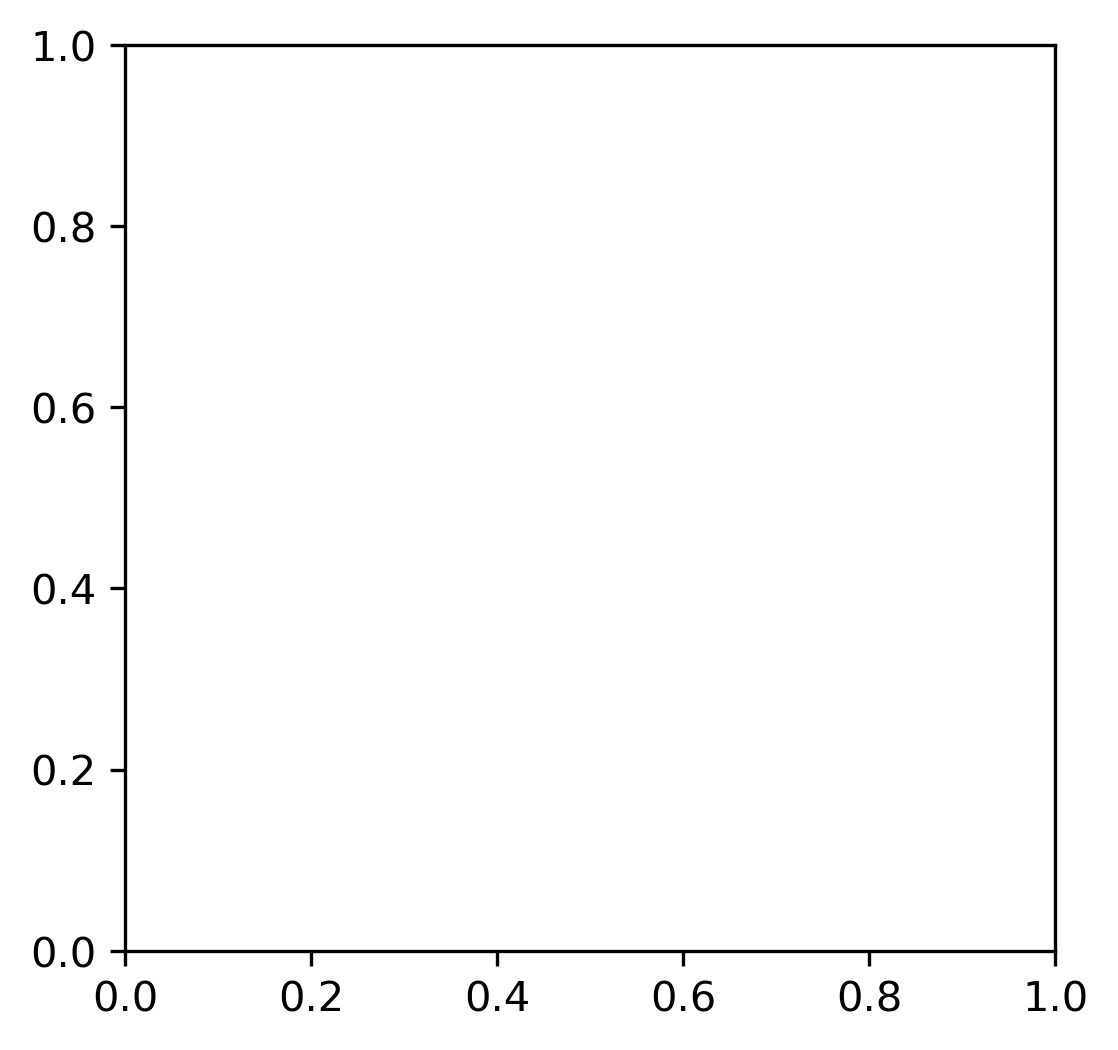

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt

features = data.columns[:-1]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtc,feature_names = features,class_names=data.columns[-1],
           filled = True);

fig.savefig('imagename.png')